## Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
%matplotlib inline

### Column settings to view full contents in the column

In [2]:
pd.set_option('display.max_colwidth', None)

## Read the cleaned articles file and save in dataframe

In [3]:
cleaned_articles_df = pd.read_csv("cleaned_articles.csv")

### Check the columns in articles dataframe

In [4]:
cleaned_articles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42322 entries, 0 to 42321
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   publish_date     42322 non-null  object
 1   title            42322 non-null  object
 2   author           42322 non-null  object
 3   url              42322 non-null  object
 4   claps            42322 non-null  int64 
 5   responses        42322 non-null  int64 
 6   reading_time     42322 non-null  int64 
 7   paid             42322 non-null  int64 
 8   content          42322 non-null  object
 9   cleaned_content  42232 non-null  object
 10  cleaned_author   42322 non-null  object
dtypes: int64(4), object(7)
memory usage: 3.6+ MB


## Read the cleaned jobs listings file and save in dataframe

In [5]:
cleaned_jobs_listings_df = pd.read_csv("cleaned_jobs_listings.csv")

### Check the columns in jobs listings dataframe

In [6]:
cleaned_jobs_listings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3909 entries, 0 to 3908
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   job_title                3909 non-null   object 
 1   salary_estimate          3909 non-null   object 
 2   job_description          3909 non-null   object 
 3   rating                   3909 non-null   float64
 4   company_name             3909 non-null   object 
 5   location                 3909 non-null   object 
 6   headquarters             3909 non-null   object 
 7   size                     3909 non-null   object 
 8   founded                  3909 non-null   int64  
 9   type_of_ownership        3909 non-null   object 
 10  industry                 3909 non-null   object 
 11  sector                   3909 non-null   object 
 12  revenue                  3909 non-null   object 
 13  competitors              3909 non-null   object 
 14  easy_apply              

## Add stopwords

In [7]:
stopwords = set(STOPWORDS)

In [8]:
stopwords.update(['job', 'skill', 'experience', 'team', 'data', 'use', 'like', 'business', 'work', 'ability', 'let', 'example'
                'need', 'new', 'user', 'opportunity', 'candidate', 'provide', 'company', 'one', 'used', 'need', 
                'see', 'make', 'follow', 'going', 'will', 'want', 'well', 'find', 'give', 'change', 'look', 'first', 'using'])

## Articles Wordcloud

### Join all the articles content into a single variable

In [9]:
all_articles_text = " ".join(article for article in cleaned_articles_df['cleaned_content'].astype(str))

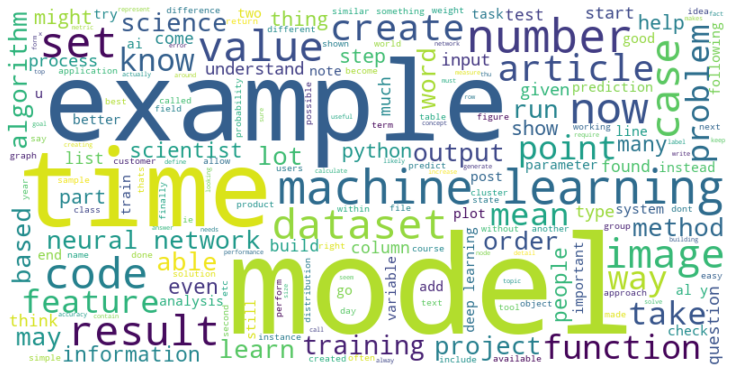

In [10]:
articles_wordcloud = WordCloud(stopwords=stopwords, background_color="white", width=800, height=400).generate(all_articles_text)
plt.figure(figsize=(10,6))
plt.axis("off")
plt.tight_layout(pad=0)
plt.imshow(articles_wordcloud, interpolation='bilinear')
plt.show()

## Jobs Listings Wordcloud

### Join all the jobs listings content into a single variable

In [11]:
all_jobs_listings_text = " ".join(job for job in cleaned_jobs_listings_df['cleaned_job_description'].astype(str))

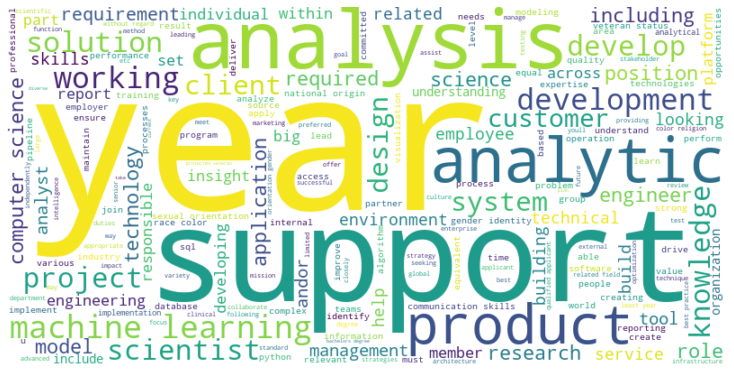

In [12]:
jobs_listings_wordcloud = WordCloud(stopwords=stopwords, background_color="white", width=800, height=400).generate(all_jobs_listings_text)
plt.figure(figsize=(10,6))
plt.axis("off")
plt.tight_layout(pad=0)
plt.imshow(jobs_listings_wordcloud, interpolation='bilinear')
plt.show()

## Combined articles and jobs listings wordcloud

### Join all the articles and jobs listings content into a single variable

In [13]:
all_text = all_articles_text + all_jobs_listings_text

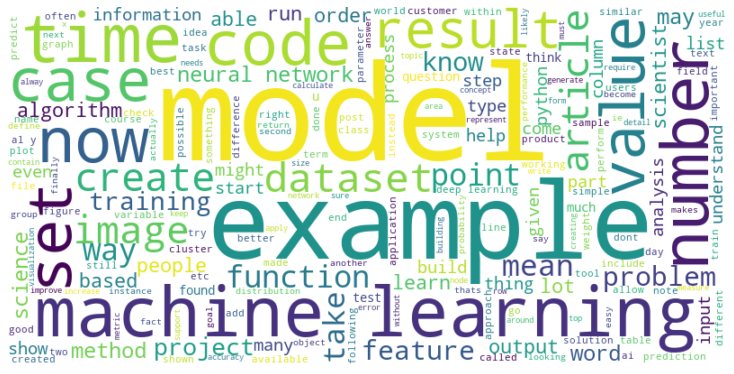

In [14]:
all_text_wordcloud = WordCloud(stopwords=stopwords, background_color="white", width=800, height=400).generate(all_text)
plt.figure(figsize=(10,6))
plt.axis("off")
plt.tight_layout(pad=0)
plt.imshow(all_text_wordcloud, interpolation='bilinear')
plt.show()

### Top Articles with most likes

In [15]:
cleaned_articles_df.sort_values(by=['claps'], ascending=False)[['title', 'claps']].head(10)

,title,claps
39060,Why so many data scientists are leaving their jobs,52000
38567,How to build your own Neural Network from scratch in Python,43000
38259,What exactly can you do with Python? Here are Python’s 3 main applications.,42000
40639,10 Common Software Architectural Patterns in a nutshell,35000
38248,Object Detection with 10 lines of code,25000
37033,How To Learn Data Science If You’re Broke,22000
39539,The 5 Clustering Algorithms Data Scientists Need to Know,20000
38038,How to land a Data Scientist job at your dream company — My journey to Airbnb,20000
39275,Introduction to Markov Chains,19910
38014,How to Build a Data Science Portfolio,18500


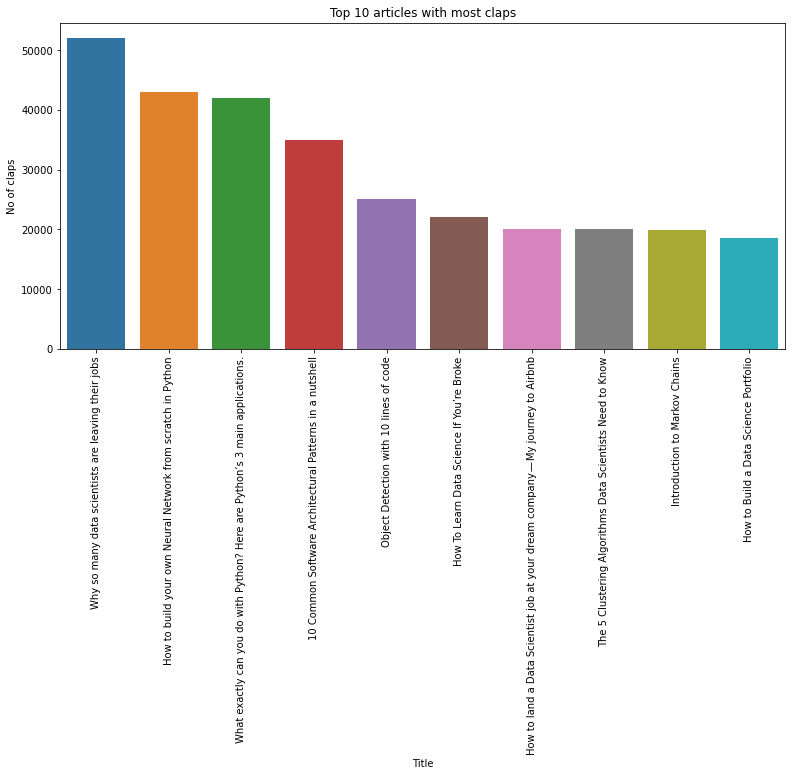

In [16]:
most_liked_articles = cleaned_articles_df.groupby('title')['claps'].agg('max').nlargest(10).reset_index()
most_liked_articles.sort_values(by='claps', ascending=False, inplace=True)
plt.figure(figsize=(13,6))
ax = sns.barplot(x="title", y="claps", data=most_liked_articles)
ax.set(xlabel='Title', ylabel='No of claps', title="Top 10 articles with most claps")
plt.xticks(rotation=90)
plt.show()

### Top Articles with most interactions

In [17]:
cleaned_articles_df.sort_values(by=['responses'], ascending=False)[['title', 'responses']].head(10)

,title,responses
39060,Why so many data scientists are leaving their jobs,298
40998,How to train your own Object Detector with TensorFlow’s Object Detector API,218
38248,Object Detection with 10 lines of code,187
38567,How to build your own Neural Network from scratch in Python,165
20977,Why Python is not the programming language of the future,162
40017,"Napoleon was the Best General Ever, and the Math Proves it.",148
22154,Why jK8v!ge4D isn’t a good password,136
38259,What exactly can you do with Python? Here are Python’s 3 main applications.,128
36322,How To Go Into Data Science?,123
38038,How to land a Data Scientist job at your dream company — My journey to Airbnb,123


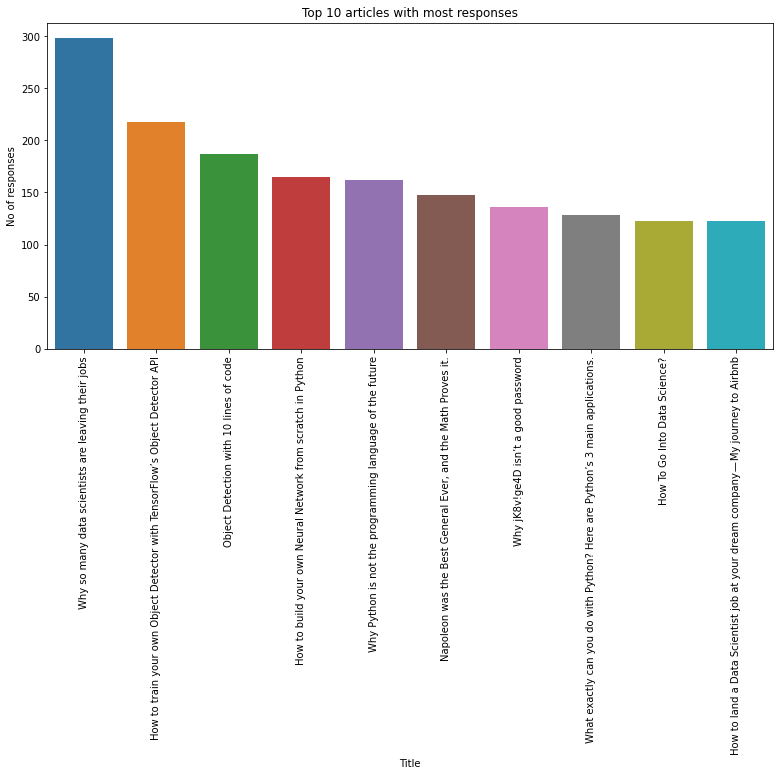

In [18]:
most_interacted_articles = cleaned_articles_df.groupby('title')['responses'].agg('max').nlargest(10).reset_index()
most_interacted_articles.sort_values(by='responses', ascending=False, inplace=True)
plt.figure(figsize=(13,6))
ax = sns.barplot(x="title", y="responses", data=most_interacted_articles)
ax.set(xlabel='Title', ylabel='No of responses', title="Top 10 articles with most responses")
plt.xticks(rotation=90)
plt.show()

## Top Industry that hires most Data Science candidates

In [19]:
# remove -1 values in industry columns
filtered_industry_df = cleaned_jobs_listings_df[cleaned_jobs_listings_df['industry'] != '-1']

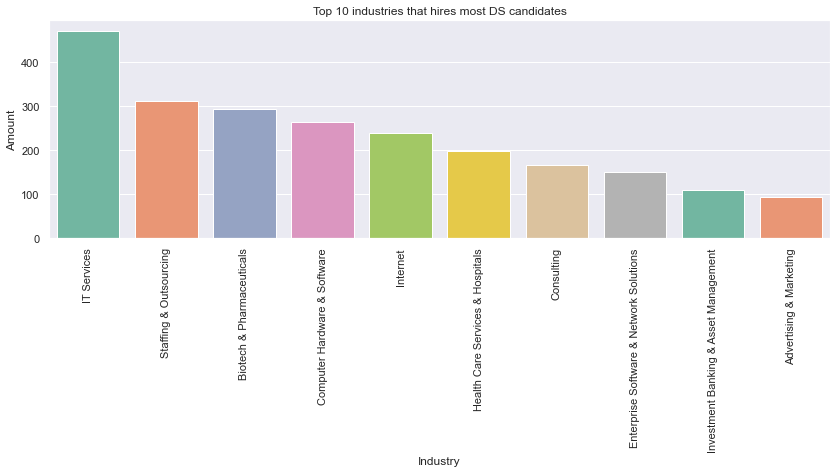

In [40]:
plt.figure(figsize=(14,4))
sns.set(style="darkgrid")
ax = sns.countplot(x="industry", data=filtered_industry_df, palette="Set2", \
                   order=filtered_industry_df['industry'].value_counts().index[0:10])
ax.set(xlabel='Industry', ylabel='Amount', title="Top 10 industries that hires most DS candidates")
plt.xticks(rotation=90)
plt.show()

## Top Sector that hires most Data Science candidates

In [21]:
# remove -1 values in sector columns
filtered_sector_df = cleaned_jobs_listings_df[cleaned_jobs_listings_df['sector'] != '-1']

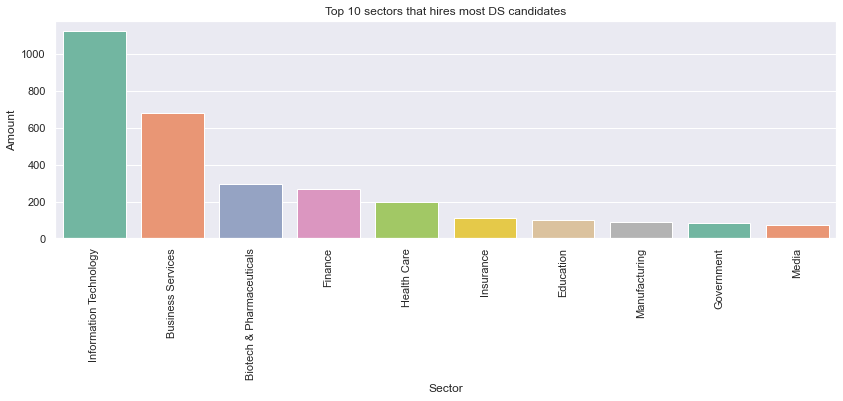

In [39]:
plt.figure(figsize=(14,4))
sns.set(style="darkgrid")
ax = sns.countplot(x="sector", data=filtered_sector_df, palette="Set2", \
                   order=filtered_sector_df['sector'].value_counts().index[0:10])
ax.set(xlabel='Sector', ylabel='Amount', title="Top 10 sectors that hires most DS candidates")
plt.xticks(rotation=90)
plt.show()

## Top Job Titles

In [23]:
# remove -1 values in job titles columns
filtered_job_titles_df = cleaned_jobs_listings_df[cleaned_jobs_listings_df['job_title'] != '-1']

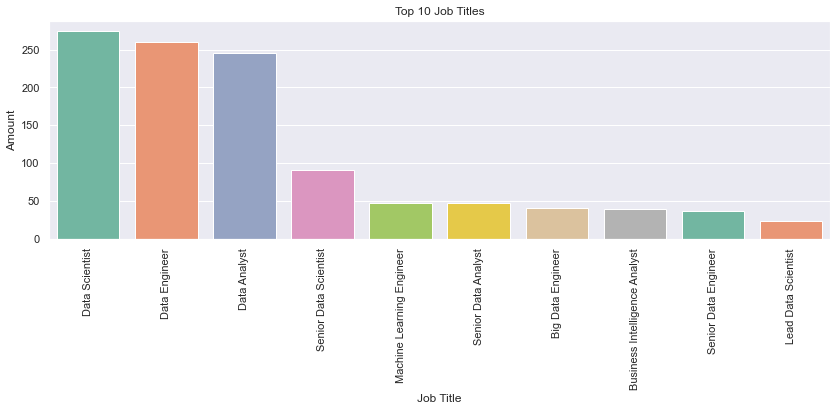

In [38]:
plt.figure(figsize=(14,4))
sns.set(style="darkgrid")
ax = sns.countplot(x="job_title", data=filtered_job_titles_df, palette="Set2", \
                   order=filtered_job_titles_df['job_title'].value_counts().index[0:10])
ax.set(xlabel='Job Title', ylabel='Amount', title="Top 10 Job Titles")
plt.xticks(rotation=90)
plt.show()

## Most in demand jobs base on salaries

### Check all different types of salary estimates

In [25]:
cleaned_jobs_listings_df['salary_estimate'].unique()

array(['$111K-$181K (Glassdoor est.)', '$120K-$140K (Glassdoor est.)',
       '$119K-$147K (Glassdoor est.)', '$74K-$124K (Glassdoor est.)',
       '$102K-$121K (Glassdoor est.)', '$129K-$210K (Glassdoor est.)',
       '$156K-$254K (Glassdoor est.)', '$116K-$152K (Glassdoor est.)',
       '$133K-$171K (Glassdoor est.)', '$110K-$139K (Glassdoor est.)',
       '$82K-$141K (Glassdoor est.)', '$96K-$119K (Glassdoor est.)',
       '$146K-$175K (Glassdoor est.)', '$102K-$164K (Glassdoor est.)',
       '$113K-$180K (Glassdoor est.)', '$76K-$122K (Glassdoor est.)',
       '$134K-$218K (Glassdoor est.)', '$76K-$125K (Glassdoor est.)',
       '$132K-$208K (Glassdoor est.)', '$83K-$105K (Glassdoor est.)',
       '$75K-$143K (Glassdoor est.)', '$34K-$72K (Glassdoor est.)',
       '$37K-$75K (Glassdoor est.)', '$113K-$184K (Glassdoor est.)',
       '$136K-$164K (Glassdoor est.)', '$34-$53 Per Hour(Glassdoor est.)',
       '$46K-$80K (Glassdoor est.)', '$79K-$130K (Glassdoor est.)',
       '$91K-$10

### Extract salary estimate start range

In [26]:
full_time_jobs = cleaned_jobs_listings_df[cleaned_jobs_listings_df['salary_estimate'].str.contains('K')]

In [27]:
full_time_jobs['salary_start_range'] = full_time_jobs['salary_estimate'].str.split('K').str[0]

<ipython-input-27-8c567d2bbf14>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_time_jobs['salary_start_range'] = full_time_jobs['salary_estimate'].str.split('K').str[0]


In [28]:
full_time_jobs['salary_start_range'] = full_time_jobs['salary_start_range'].str.split('$').str[1]

<ipython-input-28-ffe514307700>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_time_jobs['salary_start_range'] = full_time_jobs['salary_start_range'].str.split('$').str[1]


In [29]:
full_time_jobs['salary_start_range'] = full_time_jobs['salary_start_range'].astype(int)

<ipython-input-29-41b17cb8674b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_time_jobs['salary_start_range'] = full_time_jobs['salary_start_range'].astype(int)


### Extract salary estimate end range

In [30]:
full_time_jobs['salary_end_range'] = full_time_jobs['salary_estimate'].str.split('K').str[1]

<ipython-input-30-0bf9e62f8b42>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_time_jobs['salary_end_range'] = full_time_jobs['salary_estimate'].str.split('K').str[1]


In [32]:
full_time_jobs['salary_end_range'] = full_time_jobs['salary_end_range'].str.split('$').str[1]

<ipython-input-32-6e204e1ce32d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_time_jobs['salary_end_range'] = full_time_jobs['salary_end_range'].str.split('$').str[1]


In [33]:
full_time_jobs['salary_end_range'] = full_time_jobs['salary_end_range'].astype(int)

<ipython-input-33-6307b1969c1d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_time_jobs['salary_end_range'] = full_time_jobs['salary_end_range'].astype(int)


### Top 10 Job titles with most promising starting salary estimate

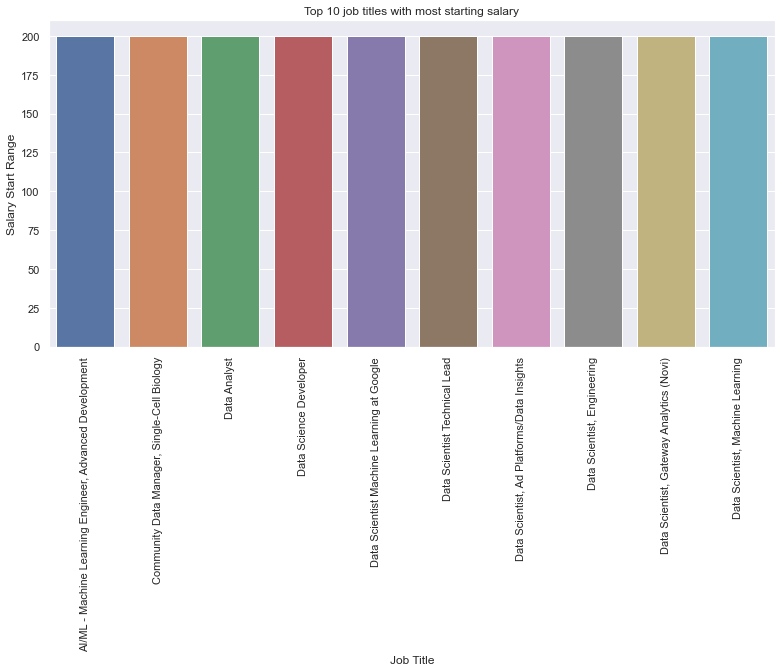

In [34]:
most_paid_starting_job_titles = full_time_jobs.groupby('job_title')['salary_start_range'].agg('max').nlargest(10).reset_index()
most_paid_starting_job_titles.sort_values(by='salary_start_range', ascending=False, inplace=True)
plt.figure(figsize=(13,6))
ax = sns.barplot(x="job_title", y="salary_start_range", data=most_paid_starting_job_titles)
ax.set(xlabel='Job Title', ylabel='Salary Start Range', title="Top 10 job titles with most starting salary")
plt.xticks(rotation=90)
plt.show()

## Top 10 Job titles with most promising end salary estimate

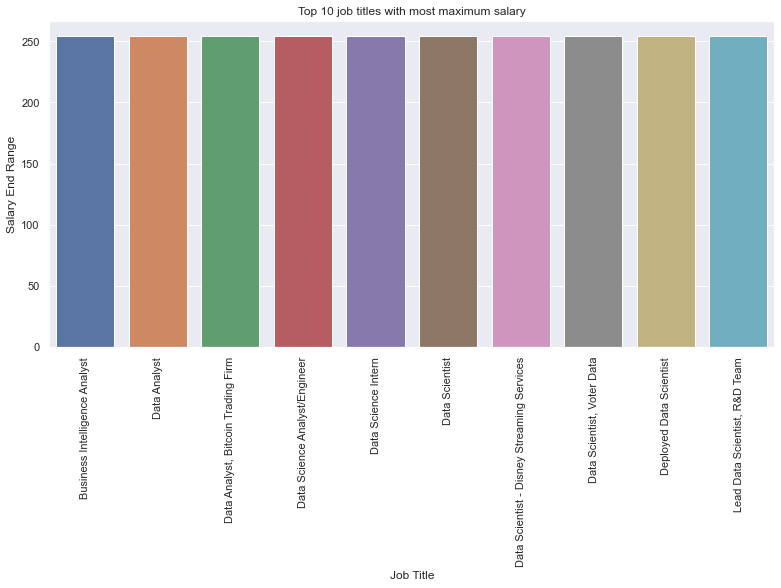

In [35]:
max_salary_job_titles = full_time_jobs.groupby('job_title')['salary_end_range'].agg('max').nlargest(10).reset_index()
max_salary_job_titles.sort_values(by='salary_end_range', ascending=False, inplace=True)
plt.figure(figsize=(13,6))
ax = sns.barplot(x="job_title", y="salary_end_range", data=max_salary_job_titles)
ax.set(xlabel='Job Title', ylabel='Salary End Range', title="Top 10 job titles with most maximum salary")
plt.xticks(rotation=90)
plt.show()